In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [2]:
HP = 'Engine HP'
PRICE = 'MSRP'

In [3]:
# Import data
df = pd.read_csv('./data/data.csv')
# Source: https://www.kaggle.com/CooperUnion/cardataset
# Remove null engine hp 
df = df[~df['Engine HP'].isnull()]
df = df[~df['Engine Cylinders'].isnull()]

# Feature Selection Linear Regression

1) If you are planning to use more than about 10 features I would recommend not using stepwise, or foward or baward selection, The number of possible combinations might take a long time to run, I suggest using a Lasso or RandomForest Regressor. Select features that

https://towardsdatascience.com/feature-selection-techniques-in-regression-model-26878fe0e24e
https://www.kaggle.com/talhahascelik/automated-stepwise-backward-and-forward-selection
https://towardsdatascience.com/stopping-stepwise-why-stepwise-selection-is-bad-and-what-you-should-use-instead-90818b3f52df

In [19]:
df.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [ ]:
hoje - year
1
2
3

In [8]:
# Lets suppose we only have 3 features to predict price:
features = ['highway MPG', 'Year', 'Engine HP']

In [ ]:
# POSSIBLE FEATURE COMBINATIONS:
# SINGLE FEATURE (3 OPTIONS)
# TWO FEATURES (3 OPTIONS)
# THREE FEATURES (1 OPTIONS)

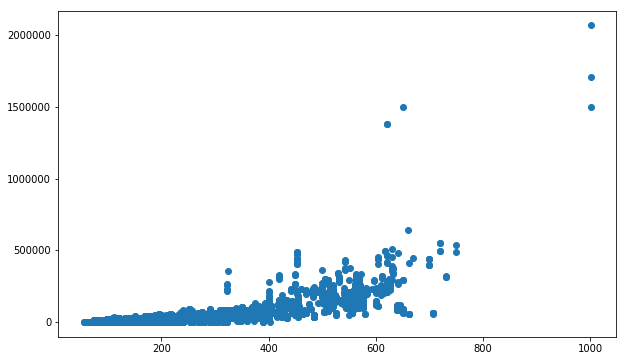

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Engine HP'], y = df['MSRP'])

# Step Wise Feature Selection

In [23]:
# 1) Run Model with each individual of feature
y = df['MSRP']
X = df['highway MPG']
X_2 = sm.add_constant(X)
model = sm.OLS(y, X_2)
results = model.fit()
print(results.summary())
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     488.5
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          4.17e-106
Time:                        19:11:32   Log-Likelihood:            -1.4659e+05
No. Observations:               11816   AIC:                         2.932e+05
Df Residuals:                   11814   BIC:                         2.932e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.308e+04   1998.514     41.571      

In [24]:
y = df['MSRP']
X = df['Year']
X_2 = sm.add_constant(X)
model = sm.OLS(y, X_2)
results = model.fit()
print(results.summary())
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     643.8
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          2.41e-138
Time:                        19:11:58   Log-Likelihood:            -1.4652e+05
No. Observations:               11816   AIC:                         2.930e+05
Df Residuals:                   11814   BIC:                         2.931e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.59e+06   1.43e+05    -25.090      0.0

In [26]:
y = df['MSRP']
X = df[['Engine HP','Year']]
X_2 = sm.add_constant(X)
model = sm.OLS(y, X_2)
results = model.fit()
print(results.summary())
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     4615.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:13:07   Log-Likelihood:            -1.4342e+05
No. Observations:               11816   AIC:                         2.868e+05
Df Residuals:                   11813   BIC:                         2.869e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.522e+04   1.17e+05      0.556      0.5

In [27]:
y = df['MSRP']
X = df[['Engine HP','highway MPG']]
X_2 = sm.add_constant(X)
model = sm.OLS(y, X_2)
results = model.fit()
print(results.summary())
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     4744.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:13:41   Log-Likelihood:            -1.4335e+05
No. Observations:               11816   AIC:                         2.867e+05
Df Residuals:                   11813   BIC:                         2.867e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.518e+04   2281.462    -32.952      

In [28]:
y = df['MSRP']
X = df[['Engine HP','highway MPG', 'Year']]
X_2 = sm.add_constant(X)
model = sm.OLS(y, X_2)
results = model.fit()
print(results.summary())
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     3202.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:14:03   Log-Likelihood:            -1.4331e+05
No. Observations:               11816   AIC:                         2.866e+05
Df Residuals:                   11812   BIC:                         2.867e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.008e+06   1.33e+05      7.574      

In [ ]:
# First feature selected is Engine HP, since it has p-value < 0.05 and lowest AIC.
y = df['MSRP']
X = df[['Engine HP']]
X_2 = sm.add_constant(X)
model = sm.OLS(y, X_2)
results = model.fit()
print(results.summary())
print('R2: ', results.rsquared)

In [4]:
columns_to_dummy = ['Vehicle Style']
dummies_df = pd.get_dummies(df[columns_to_dummy], drop_first=True,)
df2 = pd.concat([df, dummies_df], axis=1)

In [5]:
y = df2[PRICE]
x = df2[[HP] + list(dummies_df.columns)]

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [7]:
corr = df2.corr()

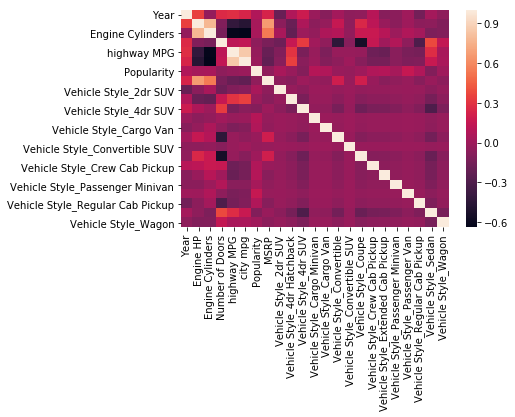

In [8]:
sns.heatmap(corr)

In [15]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [20]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = df2.columns[columns]
data = df2[selected_columns]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 31 but corresponding boolean dimension is 23

In [19]:
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])